# Mandelbrot set
This notebook generates the results used in the report for the first assignment of the course 'Stochastic Simulation'.

**Authors**:

1. Divya
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: 
- Student Number: 

2. K. López
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: kenia.lopez.sotomayor@student.uva.nl
- Student Number: 12965081

## Section 1: Implementation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import qmc


The Mandelbrot set is the set of those complex numbers c for which the function z = z * z + c does not go to infinite. 
A high number of iterations indicates slower divergence and a point that stays within bounds. 
This means that for these points, the iterative function z takes more iterations before determining that the point diverges and moves away from the set.

https://github.com/KeniaLS/Stoc_Sim_Assignment1.gitgit 

Approximated area of the Mandelbrot set: 1.514376
The number total number of points within the set: 42066


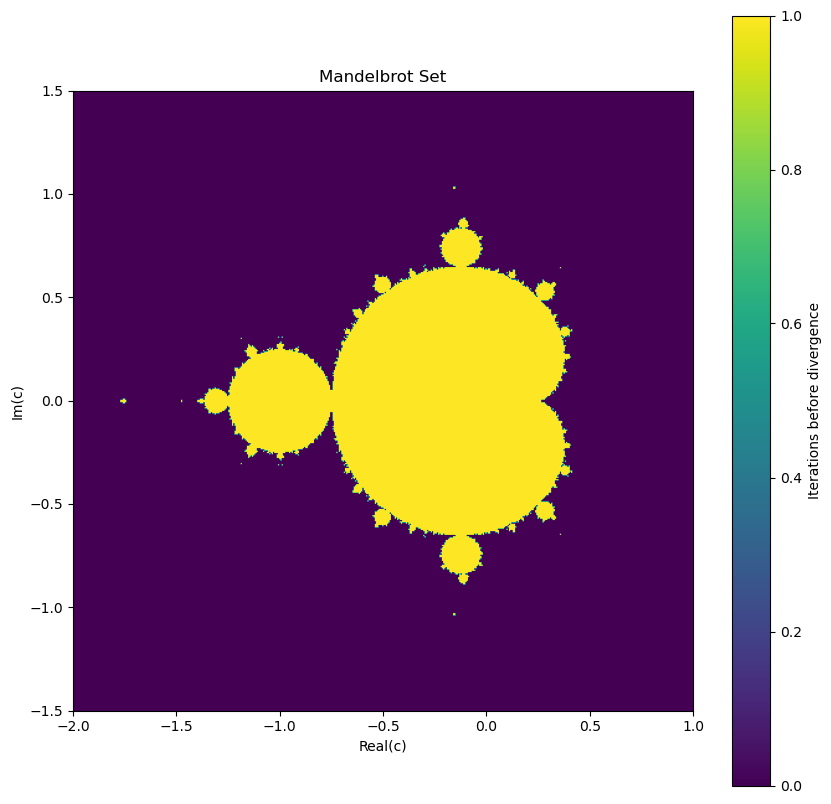

In [3]:
def mandelbrot(c, max_iter):
    '''Function that asseses if the complex number diverges after some number iterations.
    Expects: c and max_iter, a complex number and the maximum number of iterations to check for divergence.
    Modifies: nothing
    Returns: Number boolean True if the complex number does not diverege afeter a max_iter'''
    z = 0
    for n in range(max_iter):
        z = z * z + c
        if abs(z) > 2:  # Check for divergence. If the magnitude of c is greater than 2, abs(z) > 2, then the sequence will diverge to infinity.
            return False  # Point c not in Mandelbrot set
        
    return True  # Point c in Mandelbrot set


def mandelbrot_plot():
    max_iter = 255
    x_min, x_max = -2.0, 1.0
    y_min, y_max = -1.5, 1.5
    width, height = 500, 500 #Resolution of the image


    total_points = width * height
    points_inside_set = 0

    mandelbrot_image = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            real = x * (x_max - x_min) / (width - 1) + x_min
            imag = y * (y_max - y_min) / (height - 1) + y_min
            c = complex(real, imag)

            mandelbrot_image[x, y] = mandelbrot(c, max_iter)

            if mandelbrot(c, max_iter) == True:
                points_inside_set += 1

    area_ratio = points_inside_set / total_points
    total_area = (x_max - x_min) * (y_max - y_min)
    estimated_area = area_ratio * total_area
    A_M = estimated_area


    print (f"Approximated area of the Mandelbrot set: {A_M}")
    print (f"The number total number of points within the set: {points_inside_set}")


    plt.figure(figsize=(10, 10))
    plt.imshow(mandelbrot_image.T, cmap='viridis', extent=(x_min, x_max, y_min, y_max))
    plt.xlabel('Real(c)')
    plt.ylabel('Im(c)')
    plt.title('Mandelbrot Set')
    plt.colorbar(label='Iterations before divergence')
    plt.show()

    #estimated_area, points_inside = mandelbrot_area(1000)
    #print("Estimated Area:", estimated_area)
    #print("Points Inside Mandelbrot Set:", points_inside)

mandelbrot_plot()


## Convergence as Number of Iteration Increases

In [4]:
num_iters= range(1, 1000, 2)     ## range of values for changing the No. of iterations
samples  = 50                  ## sample size
area_square = 3*3                  ## area of the square in which we are taking a samples
based_iter    = []
for iters in num_iters:
    num_points_mandel = 0
    x_point = uniform.rvs(-2, 3, size=samples)
    y_point = uniform.rvs(-1.5, 3, size=samples)
    for x,y in zip(x_point, y_point):
        c = complex(x, y)
        if mandelbrot(c, iters) == True:
            num_points_mandel += 1
    area = num_points_mandel * area_square/samples
    based_iter.append(area)   

Text(0, 0.5, 'Estimated Area of Madelbrot')

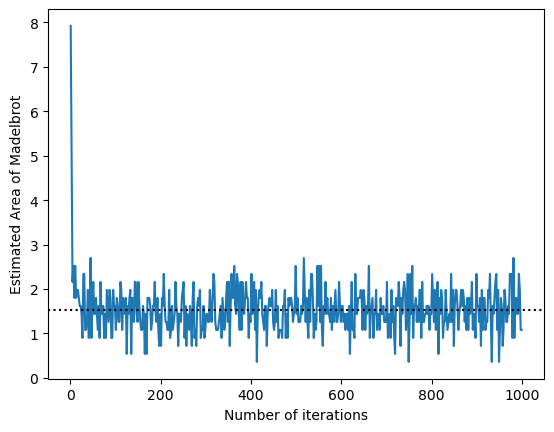

In [5]:
plt.plot(num_iters, based_iter)
plt.axhline(y = 1.52, color = 'k', linestyle = ':') 
plt.xlabel("Number of iterations")
plt.ylabel("Estimated Area of Madelbrot")

## Convergence as Number of Samples Increases

In [6]:
num_samples = range(10, 3000, 10)     ## range of values for changing the Sample size
num_iters = 400                       ## Number of iterations 
based_sample    = []

for samples in num_samples:
    num_points_mandel = 0
    x_point = uniform.rvs(-2, 3, size=samples)
    y_point = uniform.rvs(-1.5, 3, size=samples)
    for x,y in zip(x_point, y_point):
        c = complex(x, y)
        if mandelbrot(c, num_iters) == True:
            num_points_mandel += 1
    area = num_points_mandel * area_square/samples
    based_sample.append(area) 

Text(0, 0.5, 'Estimated Area of Madelbrot')

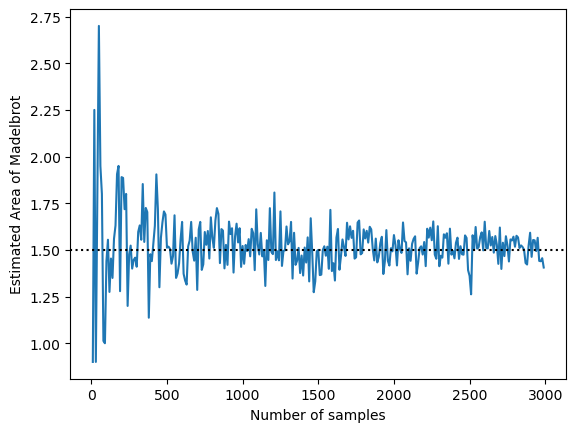

In [7]:
plt.plot(num_samples, based_sample)
plt.axhline(y = 1.5, color = 'k', linestyle = ':') 
plt.xlabel("Number of samples")
plt.ylabel("Estimated Area of Madelbrot")

## Error Calculation as Number of iteration changes

In [9]:
## Mean ARea Calculation for max no. of samples and max no. of iterations
max_iterations = 200
max_samples = 2000
area_i = []
for i in range(100):
    num_points_mandel = 0
    x_point = uniform.rvs(-2, 3, size=max_samples)
    y_point = uniform.rvs(-1.5, 3, size=max_samples)
    for x,y in zip(x_point, y_point):
        c = complex(x, y)
        if mandelbrot(c, max_iterations) == True:
            num_points_mandel += 1
    area_temp = num_points_mandel * area_square/max_samples 
    area_i.append(area_temp)

In [10]:
mean_area_i = np.mean(np.array(area_i))
sd_area_i = np.std(np.array(area_i))
print("Mean Area of Mandelbrot for Iteration= 200 and Samples = 2000 is ", mean_area_i)

Mean Area of Mandelbrot for Iteration= 200 and Samples = 2000 is  1.5290100000000004


In [11]:
num_iters= range(1, max_iterations, 2)     ## range of values for changing the No. of iterations
iter_eval    = []
for iters in num_iters:
    num_points_mandel = 0
    for x,y in zip(x_point, y_point):
        c = complex(x, y)
        if mandelbrot(c, iters) == True:
            num_points_mandel += 1
    area = num_points_mandel * area_square/samples
    iter_eval.append(area - mean_area_i) 

Text(0.5, 0, 'Number of Iterations')

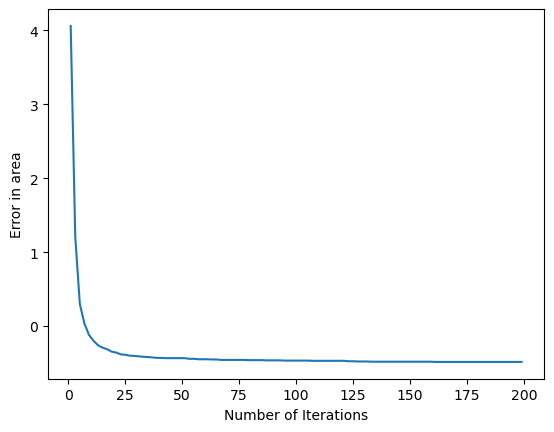

In [12]:
plt.plot(num_iters, iter_eval)
plt.ylabel("Error in area")
plt.xlabel("Number of Iterations")

In [18]:
num_samples = range(1, max_samples, 2)     ## range of values for changing the No. of iterations
sample_eval = []
for samples in num_samples:
    #temp_sample = []
    x_point = uniform.rvs(-2, 3, size=samples)
    y_point = uniform.rvs(-1.5, 3, size=samples)
    num_points_mandel = 0
    for x,y in zip(x_point, y_point):
        c = complex(x, y)
        if mandelbrot(c, max_iterations) == True:
            num_points_mandel += 1
    area = num_points_mandel * area_square/samples
    #temp_sample.append(area)
    sample_eval.append(area - mean_area_i)

Text(0.5, 0, 'Number of Samples')

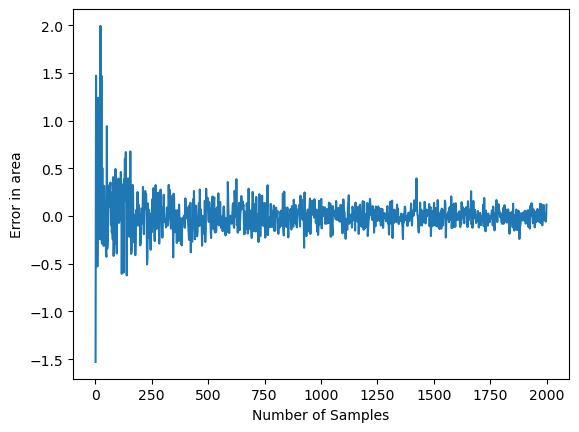

In [19]:
plt.plot(num_samples, np.array(sample_eval))
plt.ylabel("Error in area")
plt.xlabel("Number of Samples")